In [1]:
from iexfinance.stocks import get_historical_data
from iexfinance.stocks import Stock
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as pyplot
import matplotlib.dates as dates
import mpl_finance as mpfold
import json
import os
strRoot='D:\\denbrige\\180 FxOption\\103 FxOptionVerBack\\083 FX-Git-Pull\\14docktrader\\config\\'
with open(strRoot + 'iex.conf') as fJsn:
    jsnIEX = json.load(fJsn)

In [2]:
# list of tickers to be processed
def GetStockTicker():
    strTicker = []
    strInput = input("Do you want to load sp500_constituents (y/n)?: ")
    if strInput in ('y', 'Y'):
        strStockFile = "stockrow/sp500_constituents.csv"
        if os.path.exists(strStockFile) == True:
            file=open(strStockFile, "r")
            reader = csv.reader(file)
            #skip header
            next(reader) 
            for line in reader:
                strTicker.append(line[0])
        else:
            print("Error: " + strStockFile + " undefined")
    elif strInput in ('n', 'N'):
        strInput = input("Enter ticker(s) delimited by comma: ")
        for ticker in strInput.split(','):
            strTicker.append(ticker)
    else:
        print("Error: User response undefined")
    return strTicker

In [3]:
def IexStockTicker(ticker):
    # assert ticker is not empty
    if len(ticker) == 0:
        return
    
    for i in ticker:
        objStock = Stock(i, output_format='pandas', token=jsnIEX['iextoken'])
        dfCompany = objStock.get_company()
        print('\nTicker: ' + i)
        print('CEO: ' + dfCompany.loc['CEO'][0])
        print('Company: ' + dfCompany.loc['companyName'][0])
        print('Desc: ' + dfCompany.loc['description'][0])
        print('No. of Employees: ' + str(dfCompany.loc['employees'][0]))
        print('Exchange: ' + dfCompany.loc['exchange'][0])
        print('Industry: ' + dfCompany.loc['industry'][0])
        print('Sector: ' + dfCompany.loc['sector'][0])
        print('Tags: ' + ','.join(dfCompany.loc['tags'][0]))
        print('')
        dfEst = objStock.get_estimates()
        print('Fiscal Period: ' + dfEst.loc['fiscalPeriod'][0])
        print('Report Date: ' + dfEst.loc['reportDate'][0])
        print('Consensus EPS: ' + str(dfEst.loc['consensusEPS'][0]))
        print('No. of Ests: ' + str(dfEst.loc['numberOfEstimates'][0]))
        print('Fiscal EndDate: ' + dfEst.loc['fiscalEndDate'][0])

def MpfPlotWave(ticker):
    # assert ticker is not empty
    if len(ticker) == 0:
        return
    
    start=datetime(2019, 2, 9)
    end=datetime(2020,2,11)
    
    # values that can be parameterized
    intEmaPeriod = 34
    intBars = 90

    row=0
    for i in ticker:
        ohlc = get_historical_data(i, start, end, output_format='pandas', token=jsnIEX['iextoken'])
        ohlc.columns=["Open", "High", "Low", "Close", "Volume"]
        if (intBars+intEmaPeriod > len(ohlc)):
            print("Error: Bars + EmaPeriod exceeds ohlc " + str(len(ohlc)-intBars-intEmaPeriod))
            return

        hEma = ohlc['High'].ewm(intEmaPeriod).mean()
        cEma = ohlc['Close'].ewm(intEmaPeriod).mean()
        lEma = ohlc['Low'].ewm(intEmaPeriod).mean()
    
        # extract OHLC into a list of lists
        lohlc = ohlc[['Open', 'High', 'Low', 'Close']].values.tolist()
    
        # convert dates in datetime format to mathplotlib dates
        mdates = dates.date2num(ohlc.index)
    
        # prepare ohlc in mathplotlib format
        mohlc = [ [mdates[i]] + lohlc[i] for i in range(len(mdates)) ]
    
        # set default font sizes
        params = {'axes.labelsize': 20,'axes.titlesize': 24}
        pyplot.rcParams.update(params)
        
        fig, ax = pyplot.subplots(figsize = (24,24))
        
        # set default tick sizes
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.tick_params(axis='both', which='minor', labelsize=18)
    
        # mpfold.plot_day_summary_ohlc(ax, mohlc[-50:], ticksize=5, colorup='#77d879', colordown='#db3f3f') # alternatively, use a barchart
        mpfold.candlestick_ohlc(ax, mohlc[-intBars:], width=0.4, colorup='#77d879', colordown='#db3f3f')
        ax.plot(hEma[-intBars:], color='red', linewidth=2, label='high, '+str(intEmaPeriod)+'-Day EMA')
        ax.plot(cEma[-intBars:], color='green', linewidth=2, label='close, '+str(intEmaPeriod)+'-Day EMA')
        ax.plot(lEma[-intBars:], color='blue', linewidth=2, label='low, '+str(intEmaPeriod)+'-Day EMA')

        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.set_title(i +' Chart with '+str(intEmaPeriod)+'-Day EMA Wave')
        ax.legend(fontsize=20)
        ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))
        fig.autofmt_xdate()        
        
        # plt.show() # add this if you're not using Jupyter Notebook

In [4]:
strTicker = GetStockTicker()
print('No. of tickers:', len(strTicker))
IexStockTicker(strTicker)

Do you want to load sp500_constituents (y/n)?: n
Enter ticker(s) delimited by comma: MSFT
No. of tickers: 1

Ticker: MSFT
CEO: Satya Nadella
Company: Microsoft Corp.
Desc: Microsoft Corp. engages in the development and support of software, services, devices, and solutions. It operates through the following business segments: Productivity and Business Processes; Intelligent Cloud; and More Personal Computing. The Productivity and Business Processes segment comprises products and services in the portfolio of productivity, communication, and information services of the company spanning a variety of devices and platform. The Intelligent Cloud segment refers to the public, private, and hybrid serve products and cloud services of the company which can power modern business. The More Personal Computing segment encompasses products and services geared towards the interests of end users, developers, and IT professionals across all devices. The firm also offers operating systems; cross-device pr

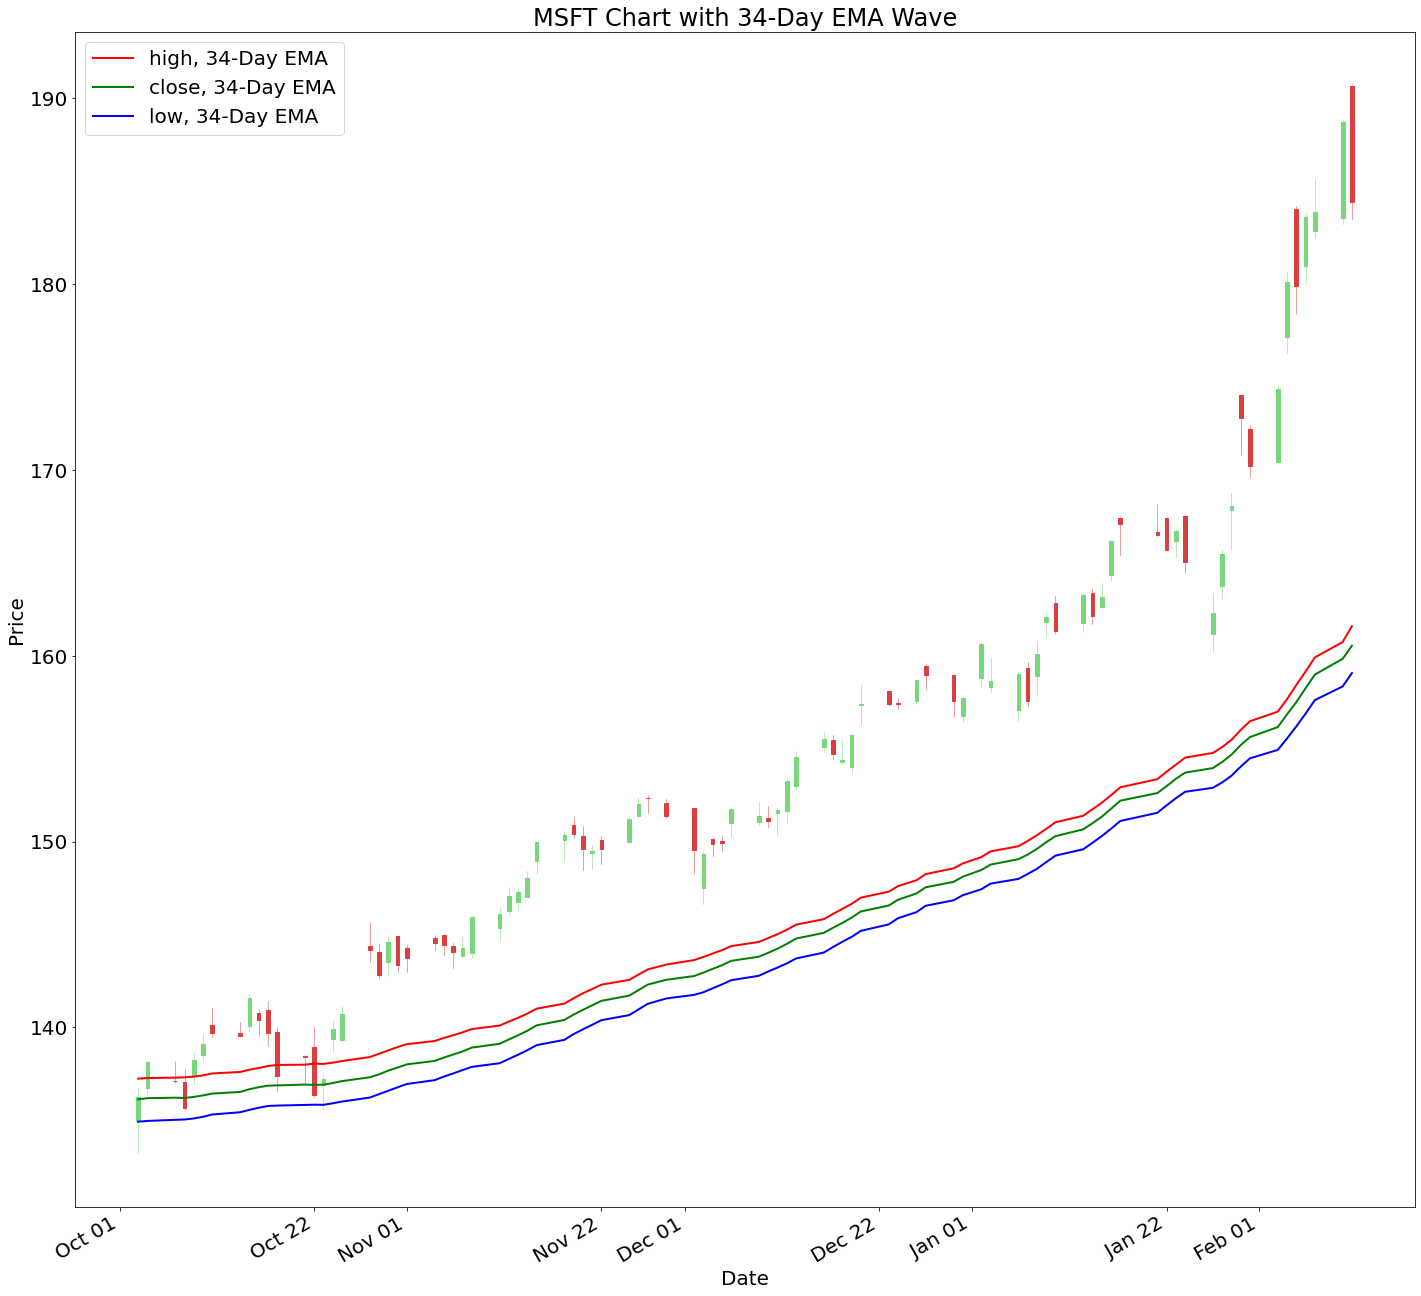

In [5]:
MpfPlotWave(strTicker)